# Homework 8

**Harvard University**<br>
**Spring 2018**<br>
**Instructors: Rahul Dave**<br>
**Due Date: ** Friday, March 30th, 2018 at 11:00am

**Instructions:**

- Upload your iPython notebook containing all work to Canvas.

- Structure your notebook and your work to maximize readability.

**Colaborator:**

Yijun Shen

In [0]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
import math
import random
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
sns.set_context('poster')

import theano.tensor as T
import pymc3 as pm
import scipy.stats as stats
from sklearn.model_selection import train_test_split


## Problem 1: Understanding Yelp Review Data As a Human
In this course, we've spent a lot of time learning algorithms for performing inference on complex models and we've spent time using these models to make decisions regarding our data. But in nearly every assignment, the model for the data is specified in the problem statement. In real life, the creative and, arguably, much more difficult task is to start with a broadly defined goal and then to customize or create a model which will meet this goal in some way. 



Problem #1 is atypical in that it does not involve any programming or (necessarily) difficult mathematics/statistics. The process of answering these questions *seriously* will however give you an idea of how one might create or select a model for a particular application and your answers will help you with formalizing the model if and when you're called upon to do so.

***Grading:*** *We want you to make a genuine effort to mold an ambiguous and broad real-life question into a concrete data science or machine learning problem without the pressure of getting the "right answer". As such, we will grade your answer of Problem #1 on a pass/fail basis. Any reasonable answer that demonstrates actual effort will be given a full grade.*

We've compiled for you a fairly representative selection of [Yelp reviews](./yelp_reviews.zip) for a (now closed) sushi restaurant called Ino's Sushi in San Francisco. Read the reviews and form an opinion regarding the various qualities of Ino's Sushi. Answer the following:

1. If the task is to summarize the quality of a restaurant in a simple and intuitive way, what might be problematic with simply classifying this restaurant as simply "good" or "bad"? Justify your answers with specific examples from the dataset.

2. For Ino's Sushi, categorize the food and the service, separately, as "good" or "bad" based on all the reviews in the dataset. Be as systematic as you can when you do this.

  (**Hint:** Begin by summarizing each review. For each review, summarize the reviewer's opinion on two aspects of the restaurant: food and service. That is, generate a classification ("good" or "bad") for each aspect based on what the reviewer writes.) 
  
3. Identify statistical weaknesses in breaking each review down into an opinion on the food and an opinion on the service. That is, identify types of reviews that make your method of summarizing the reviewer's optinion on the quality of food and service problemmatic, if not impossible. Use examples from your dataset to support your argument. 

4. Identify all the ways in which the task in #2 might be difficult for a machine to accomplish. That is, break down the classification task into simple self-contained subtasks and identify how each subtask can be accomplished by a machine (i.e. which area of machine learning, e.g. topic modeling, sentiment analysis etc, addressess this type of task).

5. Describe a complete pipeline for processing and transforming the data to obtain a classification for both food and service for each review.

### 1. If the task is to summarize the quality of a restaurant in a simple and intuitive way, what might be problematic with simply classifying this restaurant as simply "good" or "bad"? Justify your answers with specific examples from the dataset.

In [0]:
# from IPython.display import Image, display
# listOfImageNames = ['yelp_reviews/review01.png','yelp_reviews/review02.png', "yelp_reviews/review03.png", \
#                    "yelp_reviews/review04.png", "yelp_reviews/review05.png", "yelp_reviews/review06.png", \
#                    "yelp_reviews/review07.png", "yelp_reviews/review08.png", "yelp_reviews/review09.png", \
#                    "yelp_reviews/review10.png"]

# for imageName in listOfImageNames:
#     display(Image(filename=imageName))

- Giving a general classification on 'good' or 'bad' could be confusing and blur sometimes.  Which brings up complicate classification metric when we perform classification.  For example, when a customer give comment on the food from the restaurant as good, but criticized the service and environment of the restaurant a lot, then the two extreme review of different view of the resturant will be problematic for classification.

- Just give a simple classification will lose many infomation for future analysis, for example, if we try to further determine which is the best restaurant for a romantic date or best spot for group of people dine out.  

### 2. For Ino's Sushi, categorize the food and the service, separately, as "good" or "bad" based on all the reviews in the dataset. Be as systematic as you can when you do this.

| Review    | food  | service | 
|-----------|-------|---------|
| 1         | good  |  bad  |
| 2         | good  |  bad  |
| 3         | N/A   |  bad  |
| 4         | good  |  bad  |
| 5         | good  |  good |
| 6         | good  |  good |
| 7         | good  |  good |
| 8         | good  |  N/A  |
| 9         | N/A   |  bad  |
| 10        | good  | good  |

- From the above, all customers catergorized the food at Ino's Sushi as good. For the servive part, except for one no commenet, the critize and compliment are pretty even in number: there are 5 bad comments and 4 good ones. Noticebly, review 1, 2 and 4 acknowledge the good food but also comment the bad service, which seem to be impartial. Assuming these customers are real and valuable data sample, based on the majority vote principle, we can almost conclude that service at Ino's Sushi is bad.

### 3. Identify statistical weaknesses in breaking each review down into an opinion on the food and an opinion on the service. That is, identify types of reviews that make your method of summarizing the reviewer's optinion on the quality of food and service problemmatic, if not impossible. Use examples from your dataset to support your argument.

- **Incomplete Data** The premise of employing breaking down review strategy is making sure each sample/data point has all the features we require. From this yelp review case, we can see that some customer ignored feature "tasty" and some ignored "environment" etc.


### 4. Identify all the ways in which the task in #2 might be difficult for a machine to accomplish. That is, break down the classification task into simple self-contained subtasks and identify how each subtask can be accomplished by a machine (i.e. which area of machine learning, e.g. topic modeling, sentiment analysis etc, addressess this type of task).

- **Topic Modeling**: Apply supervised classification method, such as LDA (Latent Dirichlet Allocation) to extract topics from the review, treating each review as a document.

- **Sentiment Analysis**: Apply sentiment modeling to determine the writer's general attitude in a review: positive/negative/neutral.

- **Hierarchy Modeling**: Generally assign comments into goog/bad, then later break down into sub topic such as whether the food is good and whether the environment is good etc. 

### 5. Describe a complete pipeline for processing and transforming the data to obtain a classification for both food and service for each review.

**Sudo Process:**

1. For each review, extra the key word corresponding to describe the food and service;

2. Using algorithms such as Naive Bayes/k-means or logistic regression to classify the resturant review from each sample;

3. Update the overall score for resturant as good/bad;


## Problem 2: My Sister-In-Law's Baby Cousin Tracy ...


Wikipedia describes the National Annenberg Election Survey as follows -- "National Annenberg Election Survey (NAES) is the largest academic public opinion survey conducted during the American presidential elections. It is conducted by the Annenberg Public Policy Center at the University of Pennsylvania."  In the file [survey.csv](./survey.csv) we provide the following data from the 2004 National Annenberg Election Survey:  `age` -- the age of the respondents, `numr` -- the number of responses, and `knowlgbtq` -- the number of people at the given age who have at least one LGBTQ acquaintance.  We want you to model how age influences likelihood of interaction with members of the LGBTQ community in three ways. 


1. Using pymc3, create a bayesian regression model (either construct the model directly or use the glm module) with the same feature and dependent variable. Plot the mean predictions for ages 0-100, with a 2-sigma envelope.

2. Using pymc3, create a 1-D Gaussian Process regression model with the same feature and dependent variables.  Use a squared exponential covariance function. Plot the mean predictions for ages 0-100, with a 2-sigma envelope.

3. How do the models compare? Does age influence likelihood of acquaintance with someone LGBTQ? For Bayesian Linear Regression and GP Regression, how does age affect the variance of the estimates?

For GP Regression, we can model the likelihood of knowing someone LGBTQ as a product of binomials -- one binomial distribution per age group. 

$$p(y_a | \theta_a, n_a) = Binom( y_a, n_a, \theta_a)$$

where $y_a$ (i.e. `knowlgbtq`) is the observed number of respondents who know someone lgbtq  at age $a$, $n_a$ (i.e. `numr`) is the number of trials and $\theta_a$ is the rate parameter for having an lgbtq acquaintance at age $a$.

Using the Gaussian approximation  (http://en.wikipedia.org/wiki/Binomial_distribution#Normal_approximation) to approximate the Binomial since `numr` is large, you can simply use a GP posterior with the error for each measurement to be given using this approximation. 

In [0]:
sdata = pd.read_csv("survey.csv")
sdata.head()

,age,numr,knowlgbtq
0,18,310,158
1,19,221,118
2,20,217,120
3,21,255,131
4,22,301,168


In [0]:
ages = np.array(sdata['age'])
know_rate = sdata['knowlgbtq'] / sdata['numr']
know_rate = np.array(know_rate)

In [0]:
sdata.shape

(78, 3)

### 1. Using pymc3, create a bayesian regression model (either construct the model directly or use the glm module) with the same feature and dependent variable. Plot the mean predictions for ages 0-100, with a 2-sigma envelope.

In [0]:
# with pm.Model() as reg_model:
#     # Define priors
#     sigma = pm.HalfCauchy('sigma', beta=10, testval=1.)
#     intercept = pm.Normal('Intercept', 0, sd=20)
#     x_coeff = pm.Normal('x', 0, sd=20)

#     # Define likelihood
#     likelihood = pm.Normal('y', mu=intercept + x_coeff * ages,
#                         sd=sigma, observed=know_rate)

#     # Inference!
#     reg_trace = pm.sample(3000, cores=2) # draw 3000 posterior samples using NUTS sampling

In [0]:
data = dict(x=ages, y=know_rate)

with pm.Model() as glm_model:
    pm.glm.GLM.from_formula('y ~ x', data)
    glm_trace = pm.sample(3000, cores=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd_log__, x, Intercept]
100%|██████████| 3500/3500 [00:08<00:00, 411.09it/s]
The acceptance probability does not match the target. It is 0.9027527148184857, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9061150678546281, but should be close to 0.8. Try to increase the number of tuning steps.


In [0]:
with glm_model:
    glm_samples = pm.sample_ppc(glm_trace, samples=200)

100%|██████████| 200/200 [00:00<00:00, 319.88it/s]


In [0]:
glm_samples_mean = glm_samples['y'].mean(axis=0)
glm_samples_sigma = glm_samples['y'].std(axis=0)

lower_bound = glm_samples_mean - 2*glm_samples_sigma
upper_bound = glm_samples_mean + 2*glm_samples_sigma

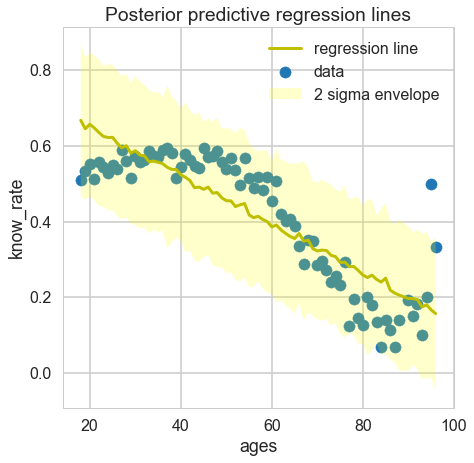

In [0]:
plt.figure(figsize=(7, 7))
plt.scatter(ages, know_rate, label='data')
# pm.plot_posterior_predictive_glm(glm_trace, samples=100, label='posterior predictive regression lines')

plt.plot(ages, glm_samples_mean, label='regression line', lw=3, c='y')
plt.fill_between(ages, lower_bound, upper_bound, facecolor='yellow', alpha=0.2, label = '2 sigma envelope')

plt.title('Posterior predictive regression lines')
plt.legend(loc=0)
plt.xlabel('ages')
plt.ylabel('know_rate')
plt.show()

<Figure size 504x504 with 0 Axes>

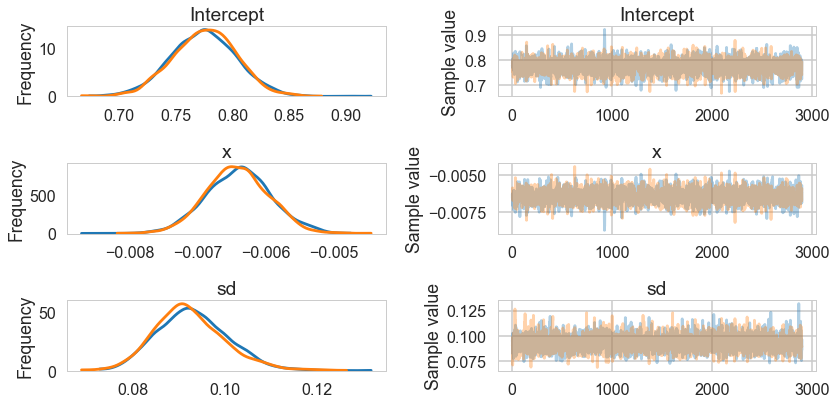

In [0]:
plt.figure(figsize=(7, 7))
pm.traceplot(glm_trace[100:])
plt.tight_layout()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x111f330b8>,
      dtype=object)

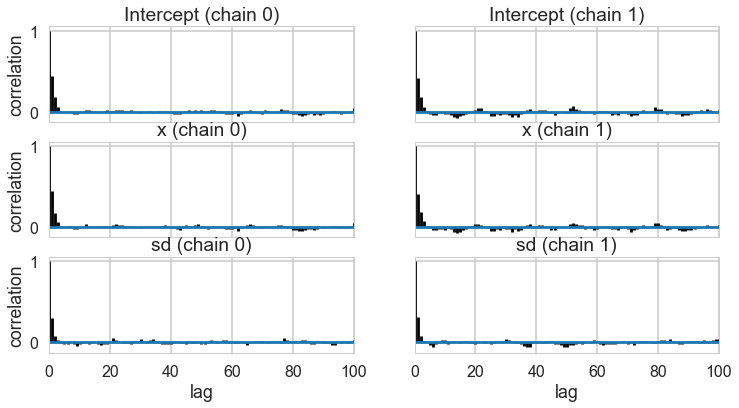

In [0]:
pm.autocorrplot(glm_trace)

### 2. Using pymc3, create a 1-D Gaussian Process regression model with the same feature and dependent variables.  Use a squared exponential covariance function. Plot the mean predictions for ages 0-100, with a 2-sigma envelope.

In [0]:
with pm.Model() as SurveyGP:

    # Lengthscale2
    length = pm.HalfCauchy('length', 1)
    sigma = pm.HalfCauchy('sigma', 1)
    
    M = pm.gp.mean.Linear(coeffs=np.mean(know_rate))
    K = (sigma**2) * pm.gp.cov.ExpQuad(1, length) 
    
    noise_term = pm.HalfCauchy('noise_term', 1)
    
    rate_gp = pm.gp.Marginal(mean_func=M, cov_func=K)
    obs_rate = rate_gp.marginal_likelihood('know', X=ages.reshape(-1,1), y=know_rate, noise=noise_term)

In [0]:
with SurveyGP:
    marginal_post = pm.find_MAP()

logp = 93.57, ||grad|| = 4.2217: 100%|██████████| 20/20 [00:00<00:00, 407.38it/s]  


In [0]:
marginal_post

{'length': array(64.23052648),
 'length_log__': array(4.16247859),
 'noise_term': array(0.04087908),
 'noise_term_log__': array(-3.19713681),
 'sigma': array(19.22282142),
 'sigma_log__': array(2.95609819)}

In [0]:
with SurveyGP:
    step=pm.Metropolis()
#     trace = pm.sample(10000, tune=2000, nuts_kwargs={'target_accept':0.85})
    trace = pm.sample(10000, tune=2000, step=step)

Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [noise_term_log__]
>Metropolis: [sigma_log__]
>Metropolis: [length_log__]
100%|██████████| 12000/12000 [00:27<00:00, 437.45it/s]
The number of effective samples is smaller than 10% for some parameters.


In [0]:
pm.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
length,68.132759,10.549648,0.219309,47.687003,88.890484,1768.0,1.000283
sigma,27.017890,13.592393,0.315521,10.675436,49.130353,1506.0,1.000033
noise_term,0.041794,0.003559,0.000064,0.035150,0.048965,3774.0,1.000456


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1123333c8>,
      dtype=object)

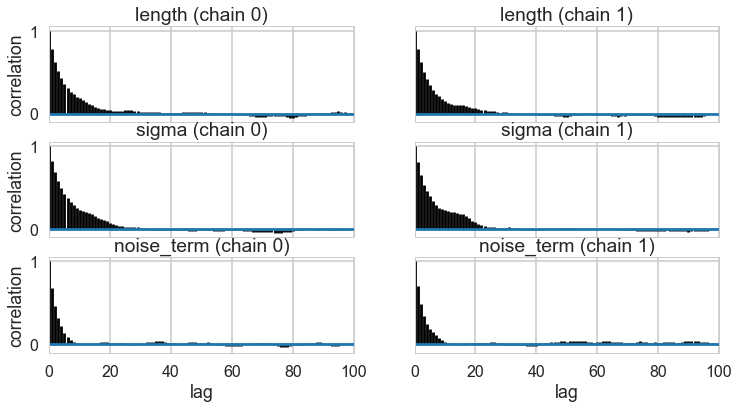

In [0]:
pm.autocorrplot(trace)

In [0]:
df = pm.trace_to_dataframe(trace)
df.corr()

,length,sigma,noise_term
length,1.000000,0.546082,0.089155
sigma,0.546082,1.000000,0.054784
noise_term,0.089155,0.054784,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x113af4208>,
      dtype=object)

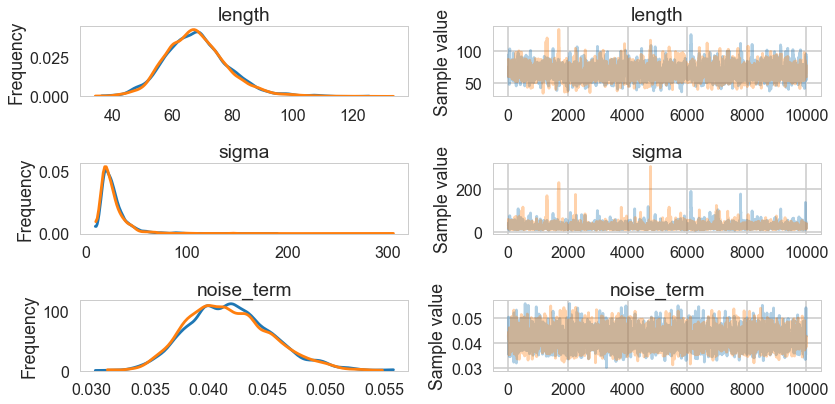

In [0]:
pm.traceplot(trace, varnames=['length', 'sigma', 'noise_term'])

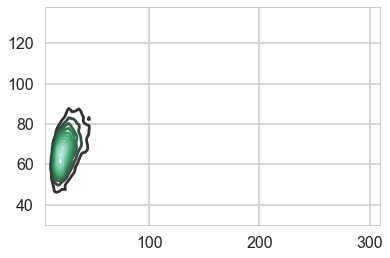

In [0]:
sns.kdeplot(trace['sigma'], trace['length'])

In [0]:
x_pred = np.linspace(0, 100, 101)

In [0]:
with SurveyGP:
    fpred = rate_gp.conditional("fpred", Xnew = x_pred.reshape(-1,1), pred_noise=False)
    ypred = rate_gp.conditional("ypred", Xnew = x_pred.reshape(-1,1), pred_noise=True)
    gp_samples = pm.sample_ppc(trace, vars=[fpred, ypred], samples=200)

100%|██████████| 200/200 [00:02<00:00, 99.30it/s]


In [0]:
meanpred = gp_samples['fpred'].mean(axis=0)
sigmapred = gp_samples['fpred'].std(axis=0)

lb = meanpred - 2*sigmapred
ub = meanpred + 2*sigmapred

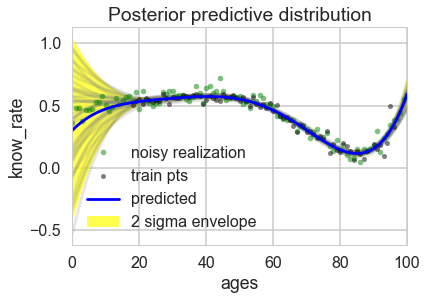

In [0]:
with sns.plotting_context("poster"):
    [plt.plot(x_pred, y, color="gray", alpha=0.2) for y in gp_samples['fpred'][::5,:]]
    # overlay the observed data
    plt.plot(x_pred, gp_samples['ypred'][123,:], '.', color="green", label="noisy realization", alpha = 0.5)
    plt.plot(ages, know_rate, 'ok', ms=5, label="train pts", alpha = 0.5)
    plt.plot(x_pred, meanpred, 'b', ms=10, label="predicted")
    plt.fill_between(x_pred, lb, ub, facecolor='yellow', alpha=0.7, label = '2 sigma envelope')

    plt.xlabel("ages")
    plt.ylabel("know_rate")
    plt.title("Posterior predictive distribution")
    plt.xlim(0,100)
    plt.legend()
    plt.show()

### 3. How do the models compare? Does age influence likelihood of acquaintance with someone LGBTQ? For Bayesian Linear Regression and GP Regression, how does age affect the variance of the estimates?

**Comparing the two model **


The first mode is more mutual more bias while larger variance, which seemed underfit, the second model is in general less variance and less bias, which may be overfit. 

Age does influence likelihood of acquaintance with someone LGBTQ, since all the model converged and showed significancy. 

For Bayesian Linear Regression and GP Regressionm,, age affect the variance of the estimates in linear and quadratic proportion in two model. 

## Problem 3:  Like a Punch to the Kidneys 

In this problem we will work with the US Kidney Cancer Dataset (by county), a dataset of kidney cancer frequencies across the US over 5 years on a per county basis. 

The kidney cancer data can be found [here](./kcancer.csv).

A casual inspection of the data might suggest that we independently model cancer rates for each of the provided counties.  Our experience in past homeworks/labs/lectures (in particular when we delved into the Rat Tumors problem) suggests potential drawbacks of conclusions based on raw cancer rates.  Addressing these drawbacks, let's look use a Bayesian model for our analysis of the data. In particular you will implement an Empircal Bayes model to examine the adjusted cancer rates per county.

Let $N$ be the number of counties; let $y_j$ the number of kidney cancer case for the $j$-th county, $n_j$ the population of the $j$-th county and $\theta_j$ the underlying kidney cancer rate for that county. We can construct a Bayesian model for our data as follows:
\begin{aligned}
y_j &\sim Poisson(5 \cdot n_j \cdot \theta_j), \quad j = 1, \ldots, N\\
\theta_j &\sim Gamma(\alpha, \beta), \quad j = 1, \ldots, N
\end{aligned}
where $\alpha, \beta$ are hyper-parameters of the model.

- (#1) Implement Empirical Bayes via moment matching as described as follows. Consider the **prior-predictive** distribution (also called the evidence i.e. the denominator normalization in bayes theorem) of the model: $p(y) = \int p(y \vert \theta) p(\theta) d \theta$. Why the prior-predictive? Because technically we "haven't seen" individual county data yet.  For this model, the prior-predictive is a negative binomial. Matching the mean and the variance of the negative binomial to that from the data, you can find appropriate expressions for $\alpha$ and $\beta$. (Hint: You need to be careful with the $5n_j$ multiplier.) 

In [0]:
cdata = pd.read_csv('./kcancer.csv')
cdata.head()

,state,fips,county,countyfips,dc,pop,pct_mortality
0,ALABAMA,1,AUTAUGA,1001,1.0,64915.0,0.000015
1,ALABAMA,1,BALDWIN,1003,15.0,195253.0,0.000077
2,ALABAMA,1,BARBOUR,1005,1.0,33987.0,0.000029
3,ALABAMA,1,BIBB,1007,1.0,31175.0,0.000032
4,ALABAMA,1,BLOUNT,1009,5.0,91547.0,0.000055


In [0]:
N = cdata.shape[0]
N

3113

The prior-predictive is a negative binomial such that $y_j$ ~ Neg Binom($\alpha$, $\frac{5n_j}{5n_j + \beta}$). For a negative binomial distribution NB(r, p), the mean is $\frac{pr}{1-p}$, and the variance is $\frac{pr}{(1-p)^2}$. Therefore, we can calculate the mean and the variance for this particular NB distribution:

$E[y_j] = \frac{5n_j \alpha}{\beta}$

$Var[y_j] = \frac{(5n_j)^2 \alpha}{\beta ^2} + \frac{5n_j \alpha}{\beta} = E[y_j] \frac{5n_j + \beta}{\beta}$

Then:

$E[\frac{y_j}{n_j}] = \frac{E[y_j]}{n_j} = \frac{5\alpha}{\beta}$, so we have $\alpha = E[\frac{y_j}{n_j}] * \beta / 5$

$Var[\frac{y_j}{n_j}] = \frac{25 \alpha}{\beta^2} + \frac{5\alpha}{\beta n_j} = E[\frac{y_j}{n_j}](\frac{5}{\beta} + \frac{1}{n_j})$ so $\beta = 5 / (\frac{var[y_j / n_j]}{E[y_j / n_j]} - \frac{1}{n_j})$

In [0]:
pct_mu = cdata['pct_mortality'].mean()
pct_var = cdata['pct_mortality'].var()
dc_mu = cdata['dc'].mean()
dc_var = cdata['dc'].var()
n_j_mean = cdata['pop'].mean()

In [0]:
pct_mu, pct_var

(5.786552354108432e-05, 2.528335196869748e-09)

In [0]:
beta = 5 / (pct_var/pct_mu - 1/n_j_mean)
alpha = pct_mu * beta / 5
print("alpha = ", alpha)
print("beta = ", beta)

alpha =  1.54459458659545
beta =  133464.15033286557


- (#2) Produce a scatter plot of the raw cancer rates (pct mortality) vs the county population size. Highlight the top 300 raw cancer rates in red. Highlight the bottom 300 raw cancer rates in blue. Finally, on the same plot add a scatter plot visualization of the posterior mean cancer rate estimates (pct mortality) vs the county population size, highlight these in green.

In [0]:
thetas = []
for i in range(N):
    y_j = cdata['dc'].iloc[i]
    n_j = cdata['pop'].iloc[i]
    thetas.append(np.random.gamma(alpha+y_j, 1/(beta+5*n_j), size=5000).mean())

In [0]:
thetas = np.array(thetas)
thetas

array([5.50296731e-06, 1.48498632e-05, 8.34350496e-06, ...,
       6.51289455e-06, 1.43009916e-05, 6.83928736e-06])

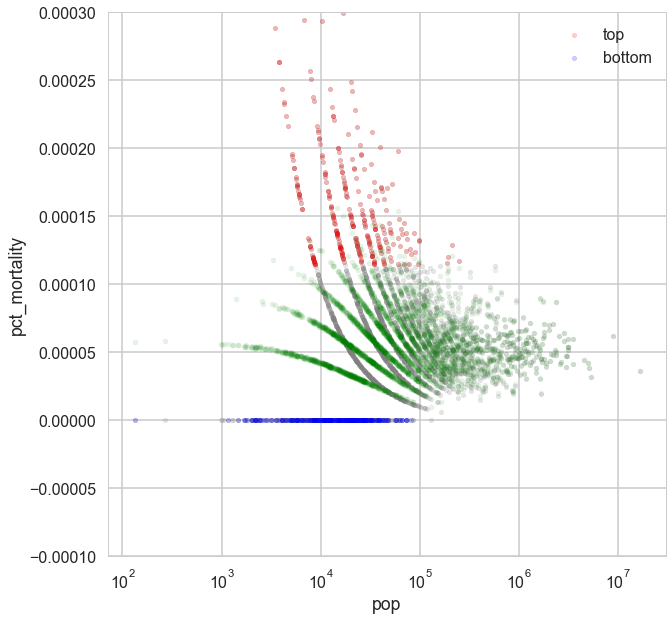

In [0]:
ax = cdata.plot(kind='scatter', x="pop",y="pct_mortality", alpha=0.2, color="grey", logx=True, figsize=(10,10))
bot_kcancer_counties = cdata.sort_values(by='pct_mortality',ascending=True)[:300]
top_kcancer_counties = cdata.sort_values(by='pct_mortality',ascending=False)[:300]
top_kcancer_counties.plot(kind='scatter',x="pop",y="pct_mortality",alpha=0.2, color="red", label="top", ax=ax, logx=True)
bot_kcancer_counties.plot(kind='scatter',x="pop",y="pct_mortality",alpha=0.2, color="blue", label="bottom", ax=ax, logx=True)
ax.plot(cdata['pop'], 5*thetas, '.', alpha=0.1, color="green")
ax.set_ylim([-0.0001, 0.0003])
plt.legend()
plt.show()

- (#3) Using the above scatter plot, explain why using the posterior means from our model to estimate cancer rates is preferable to studying the raw rates themselves.

(**Hint:** You might also find it helpful to follow the Rat Tumor example.)

(**Note:** Up until now we've had primarily thought about the posterior predictive: $\int p( y \vert \theta) p(\theta \vert D) d\theta$.  The posterior predictive and the prior predictive can be somewhat connected. In conjugate models such as ours, the two distributions have the same form.) 

- The raw cancer mortality rates are very sensitive to the country population. If the county has very few people, then even a small number of kidney cancer deaths can result in a high mortality rate. Therefore, it is not very useful if we want to compare mortality rates between different counties.

- When we are using the posterior predictive, we assume that the mortality rates come from a common prior gamma distribution. This is like a regularization. Now population has a smaller effect on the mortality rates.

## Problem 4: In the Blink of a Bayesian Iris

We've done classification before, but the goal of this problem is to introduce you to the idea of classification using Bayesian inference. 

Consider the famous *Fisher flower Iris data set* a  multivariate data set introduced by Sir Ronald Fisher (1936) as an example of discriminant analysis. The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, you will build a model to predict the species. 

For this problem only consider two classes: **virginica** and **not-virginica**. 

The iris data can be obtained [here](./iris.csv).

Let $(X, Y )$ be our dataset, where $X=\{\vec{x}_1, \ldots \vec{x}_n\}$ and $\vec{x}_i$ is the standard feature vector corresponding to an offset 1 and the four components explained above. $Y \in \{0,1\}$ are the scalar labels of a class. In other words the species labels are your $Y$ data (virginica = 0 and virginica=1), and the four features -- petal length, petal width, sepal length and sepal width -- along with the offset make up your $X$ data. 

The goal is to train a classifier, that will predict an unknown class label $\hat{y}$ from a new data point $x$. 

Consider the following glm (logistic model) for the probability of a class:

$$ p(y) = \frac{1}{1+e^{-x^T \beta}} $$

(or $logit(p) = x^T \beta$ in more traditional glm form)

where $\beta$ is a 5D parameter to learn. 

Then given $p$ at a particular data point $x$, we can use a bernoulli likelihood to get 1's and 0's. This should be enough for you to set up your model in pymc3. (Other Hints: also use theano.tensor.exp when you define the inverse logit to go from $\beta$ to $p$, and you might want to set up $p$ as a deterministic explicitly so that pymc3 does the work of giving you the trace).

Use a 60-40 stratified (preserving class membership) split of the dataset into a training set and a test set. (Feel free to take advantage of scikit-learn's `train_test_split`).

1. Choose a prior for $\beta \sim N(0, \sigma^2 I) $ and write down the formula for the normalized posterior $p(\beta| Y,X)$. Since we dont care about regularization here, just use the mostly uninformative value $\sigma = 10$.
2. Find the MAP and mean estimate for the posterior on the training set.
3. Implement a  sampler to sample from this posterior of $\beta$.   Generate samples of $\beta$ and plot the sequence of $\beta$'s  and histograms for each $\beta$ component.

In [0]:
idata = pd.read_csv('iris.csv')
idata['class'] = idata['class'].str.strip()
idata['y'] = np.ones((idata.shape[0], 1))
idata['y'][idata['class'] == 'Iris-virginica'] = 0
idata.head()

,sepal_length,sepal_width,petal_length,petal_width,class,y
0,5.1,3.5,1.4,0.2,Iris-setosa,1.0
1,4.9,3.0,1.4,0.2,Iris-setosa,1.0
2,4.7,3.2,1.3,0.2,Iris-setosa,1.0
3,4.6,3.1,1.5,0.2,Iris-setosa,1.0
4,5.0,3.6,1.4,0.2,Iris-setosa,1.0


In [0]:
idata.tail()

,sepal_length,sepal_width,petal_length,petal_width,class,y
145,6.7,3.0,5.2,2.3,Iris-virginica,0.0
146,6.3,2.5,5.0,1.9,Iris-virginica,0.0
147,6.5,3.0,5.2,2.0,Iris-virginica,0.0
148,6.2,3.4,5.4,2.3,Iris-virginica,0.0
149,5.9,3.0,5.1,1.8,Iris-virginica,0.0


In [0]:
idata.shape

(150, 6)

### 1. Choose a prior for $\beta \sim N(0, \sigma^2 I) $ and write down the formula for the normalized posterior $p(\beta| Y,X)$. Since we dont care about regularization here, just use the mostly uninformative value $\sigma = 10$.

$$ \beta  \sim N(0,\sigma^2I) $$

$$p(\beta|Y,X) = \frac{p(Y,X|\beta)p(\beta)}{p(Y,X)} = \frac{p(Y,X|\beta)p(\beta)}{\int p(Y,X|\beta)d\beta} $$

$$
p(\beta|Y,X) \propto \left [ \prod_{i=1}^{n} \left ( \frac{1}{1+e^{-x_{i}^T \beta}} \right ) ^{y_i} \left (1-\frac{1}{1+e^{-x_{i}^T \beta}} \right )^{(1-y_i)} \right ] * N(0,\sigma^2I)
$$

In [0]:
# extract predictors
x_preds = np.array(idata[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values)
x = np.concatenate([np.ones((idata.shape[0], 1)), x_preds], axis=1)
y = idata['y'].values

In [0]:
# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0, stratify=y)

In [0]:
with pm.Model() as model:

    beta = pm.Normal('beta', mu=0, sd=10, shape=5) 
    
    p = pm.Deterministic('p', 1/(1 + T.exp(-T.dot(X_train, beta))))

    yhat = pm.Bernoulli("yhat", p, observed=y_train)

### 2. Find the MAP and mean estimate for the posterior on the training set.

In [0]:
# MAP estimate
map_beta = pm.find_MAP(model=model)['beta']
print("MAP estimate: ", map_beta)

logp = -24.201, ||grad|| = 0.033489: 100%|██████████| 49/49 [00:00<00:00, 1541.12it/s]  

MAP estimate:  [12.30500955  2.21324312  4.2623057  -4.91712564 -8.47024868]


In [0]:
with model:
    trace = pm.sample(10000, pm.NUTS())

Multiprocess sampling (2 chains in 2 jobs)
NUTS: [beta]
100%|██████████| 10500/10500 [01:51<00:00, 94.19it/s]
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


In [0]:
# Mean estimate 
mean_beta = np.mean(trace['beta'], axis=0)
print("mean estimate: ", mean_beta)

mean estimate:  [ 14.79936885   3.09468039   5.44777232  -6.56934557 -10.44465999]


### 3. Implement a  sampler to sample from this posterior of $\beta$.   Generate samples of $\beta$ and plot the sequence of $\beta$'s  and histograms for each $\beta$ component.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115667a20>,
      dtype=object)

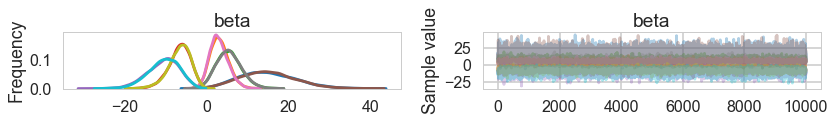

In [0]:
pm.traceplot(trace, varnames=['beta'])

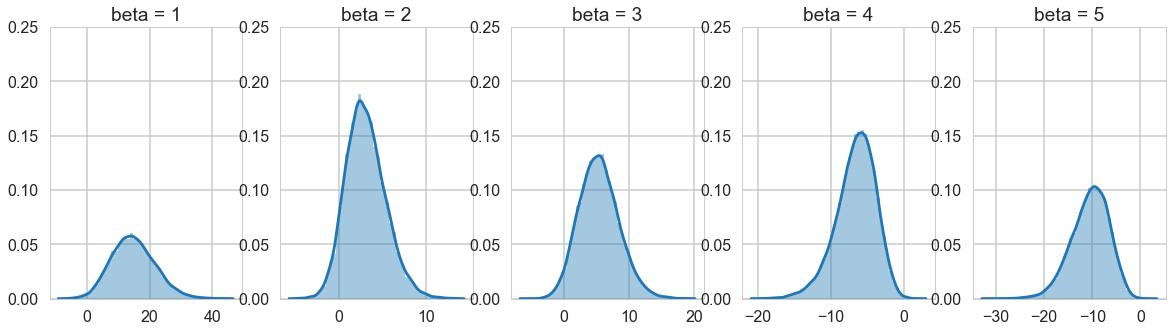

In [0]:
# plot histograms of beta from all 10000 traces 
plt.figure(figsize=(20,5))
for i in range(5):
    plt.subplot(1,5,i+1)
    g = sns.distplot(trace['beta'][:,i])
    g.set(ylim=(0, 0.25))
    plt.title('beta = {}'.format(i+1))